## Logistic Regression Implementation in Python

##### Logistic regression comes under the supervised learning technique. It is a  classification algorithm that is used to predict discrete values such as 0 or 1, Malignant or Benign, Spam or Not spam, etc.

##### Problem statement: The aim is to make predictions on the survival outcome of passengers.

##### Since this is a binary classification, logistic regression can be used to  build the model.

In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix   ## used to calculate model accuracy and confusion matirxs
%matplotlib inline 

##### numpy: NumPy stands for numeric Python, a python package for the computation and processing of the multi-dimensional and single-dimensional array elements.

##### pandas: Pandas provide high-performance data manipulation in Python.

##### matplotlib: Matplotlib is a library used for data visualization. It is mainly used for basic plotting. Visualization using Matplotlib generally consists of bars, pies, lines, scatter plots, and so on.

##### seaborn: Seaborn is a library used for making statistical graphics of the dataset. It provides a variety of visualization patterns. It uses fewer syntax and has easily interesting default themes. It is used to summarize data in visualizations and show the data’s distribution.

In [109]:
df=pd.read_csv('titanicTrain.csv')

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dataset Column Description
##### PassenderId: PassengerId is the Id given to all the passengers to identify each individual uniquely.
##### Survived: Survived indicates whether the passenger survived or not (0 for not survived and 1 for survived).
##### Pclass: Passenger class indicates the class a passenger belongs to (1 for 1st class, 2 for 2nd class, and 3 for 3rd class).
##### Name: Name is the name of the passenger.
##### Sex: Sex indicates the gender of the passenger.
##### Age: Age indicates the age of the passenger.
##### SibSp: SibSp indicates the number of siblings/spouses aboard.
##### Parch: Parch indicates the number of parents/children aboard.
##### Ticket: Ticket indicates the ticket number.
##### Fare: Fare is the passenger fare in pounds.
##### Cabin: The cabin indicates the cabin number.
##### Embarked: Embarked indicates port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
##### Data Pre-Processing
##### Checking for missing values in the dataset

In [111]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### The columns Age, Cabin, and Embarked have missing values.

### Imputation of missing values

In [112]:
### Median of the Age Columns

print('median of Age Column: %.2f' % (df['Age'].median(skipna= True)))

### Percentage of missing record in the cabin columns
print('Percentage of missing records in the cabin columns: %.2f%%' % ((df['Cabin'].isnull().sum()/df.shape[0])*100))


#Most common boarding port of embarkation
print('Most common boarding port of embarkation: %s' % df['Embarked'].value_counts().idxmax())

median of Age Column: 28.00
Percentage of missing records in the cabin columns: 77.10%
Most common boarding port of embarkation: S


##### We’ll fill the missing values of the Age column by the median of the age column.

##### We’ll drop the Cabin column as 77.10% of the records are missing.

##### We’ll fill the missing values of the Embarked column by the most common port of embarkation, i.e., S, which indicates Southampton.

In [113]:
## filling all nan values in age group 
df['Age'].fillna(df['Age'].median(skipna=True),inplace = True)

In [114]:
#Fillimg Embarked column by the most common port of embarkation
df["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)


In [115]:
df.drop(columns='Cabin',axis=1,inplace = True )

In [116]:
#Checking for missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Now, there are no missing values present in the datase

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

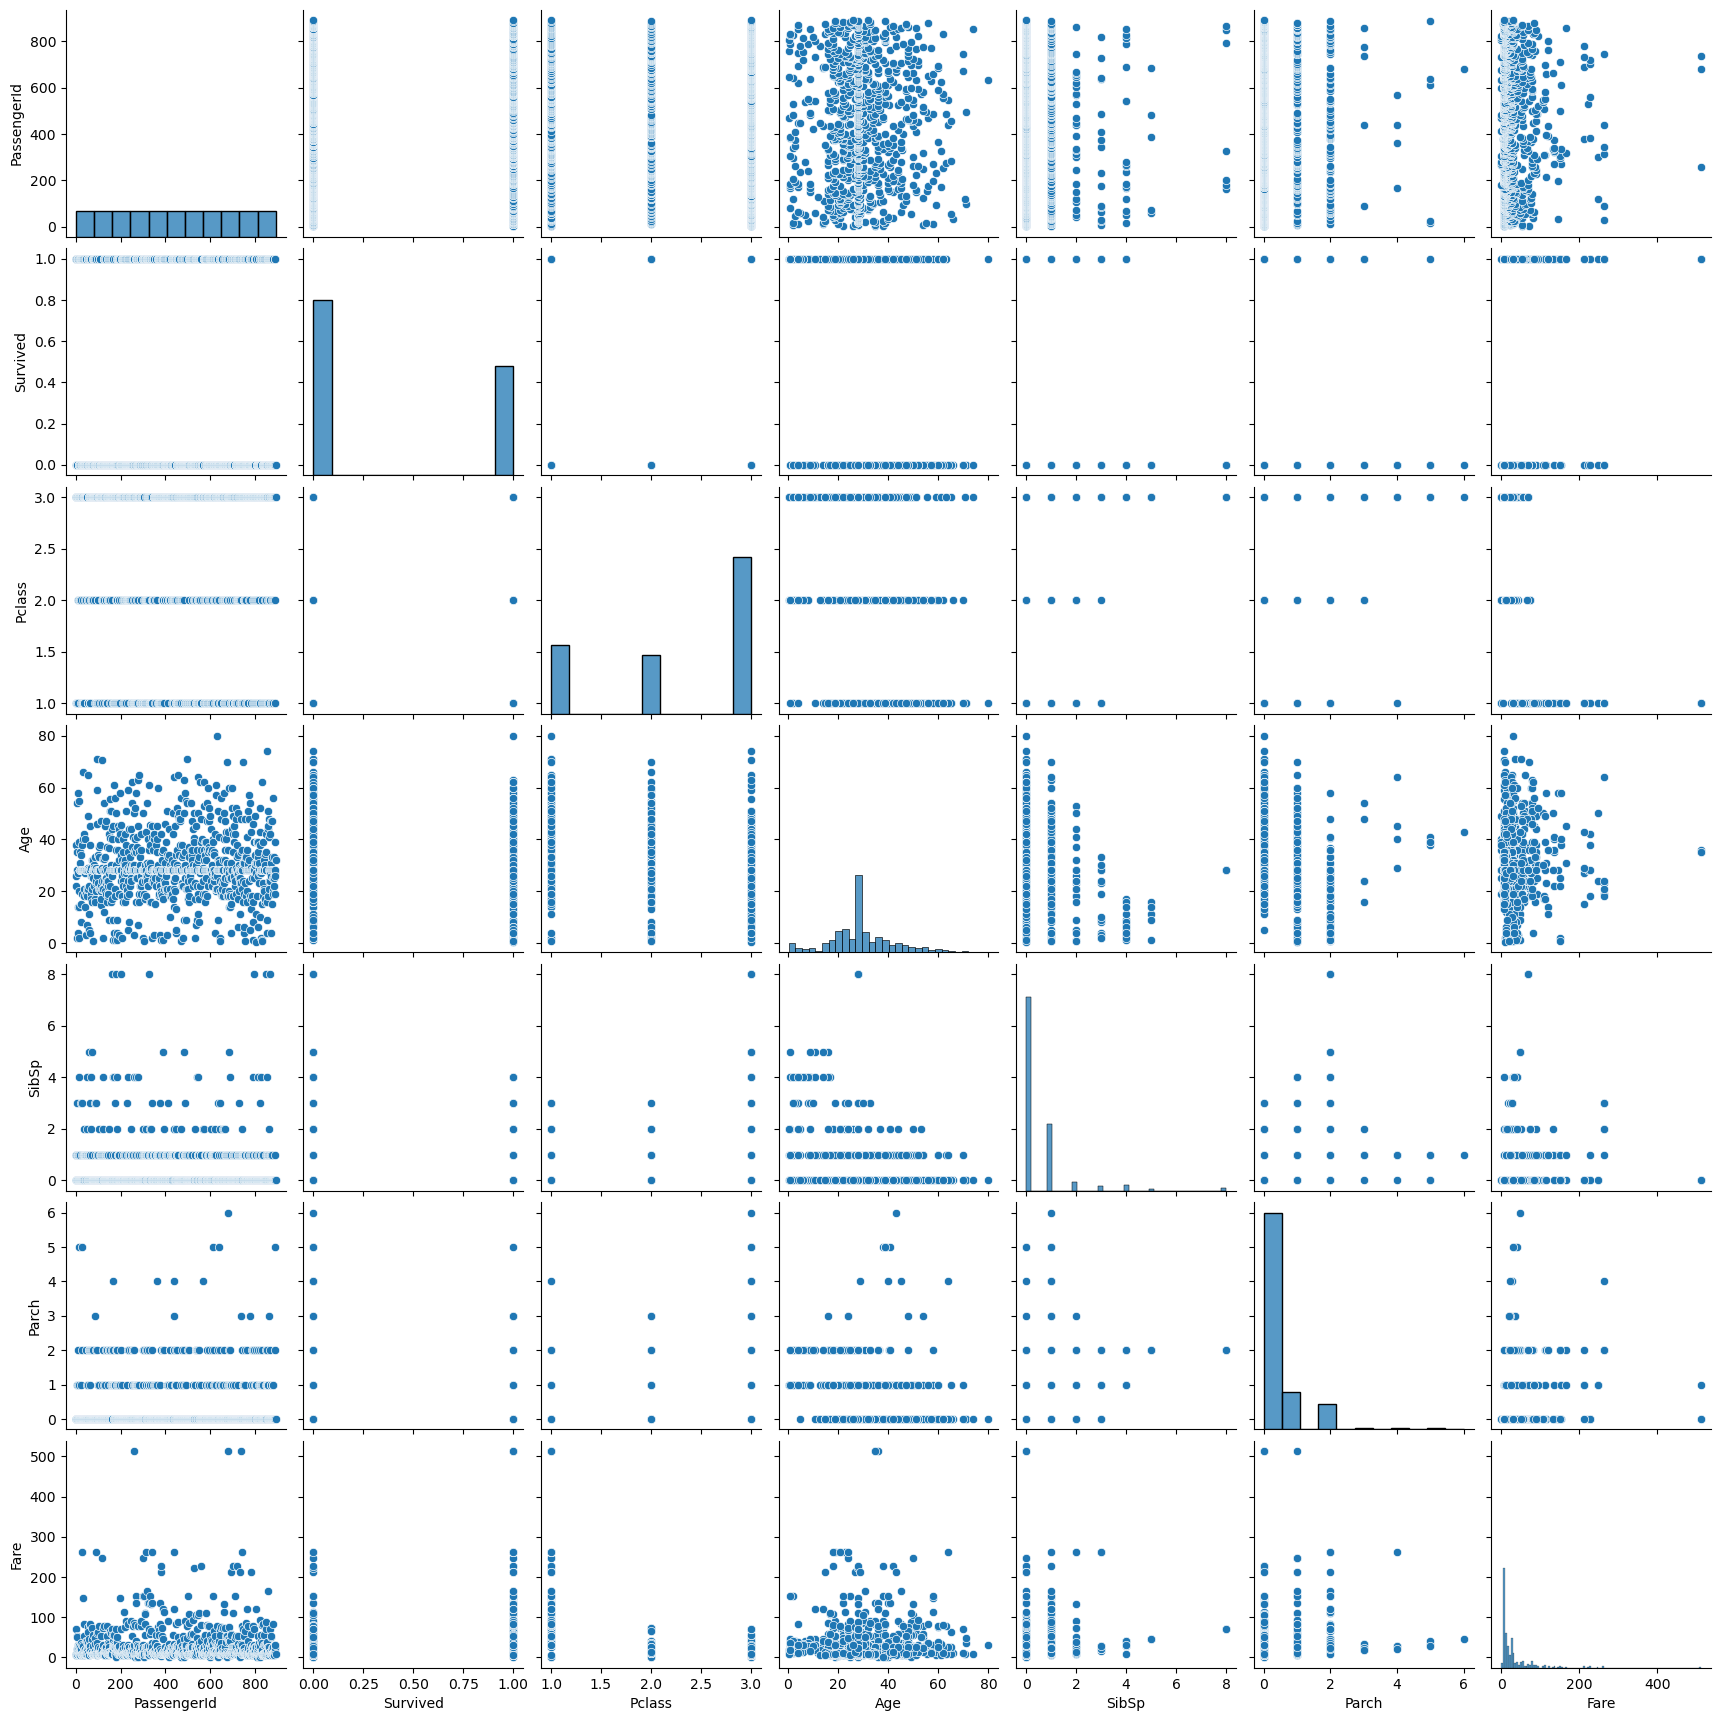

In [117]:
sns.pairplot(df)

In [118]:
#Dropping unnecessary columns
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket',  axis=1, inplace=True)

##### The columns PassengerId, Name, and Ticked are unnecessary as they do not affect the target variable, i.e., Survived. Therefore, we can drop those columns from the dataset.

In [119]:
#Creating variable TravelAlone
df['TravelAlone']=np.where((df["SibSp"]+df["Parch"])>0, 0, 1)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)

In [124]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


##### SibSp and Parch relate to traveling with family. For simplicity’s sake and to account for possible multicollinearity, we can combine the effect of these variables into one predictor variable, i.e., TravelAlone, which will indicate whether or not that individual was traveling alone

### Exploratory Data Analysis
##### Dataset shape

In [120]:
## Number of row and columns of train set 
df.shape

(891, 7)

#### There are 891 rows and 7 columns in the dataset

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   TravelAlone  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [122]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [123]:
df.describe()

,Survived,Pclass,Age,Fare,TravelAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,0.602694
std,0.486592,0.836071,13.019697,49.693429,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


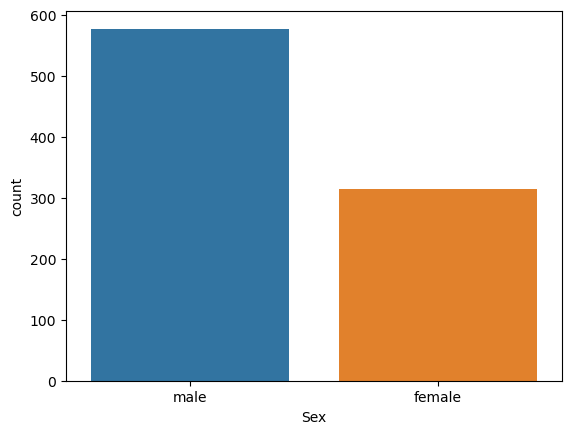

In [125]:
#Count of passengers based on gender

sns.countplot(data=df,x='Sex')
count_sex=df['Sex'].value_counts()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

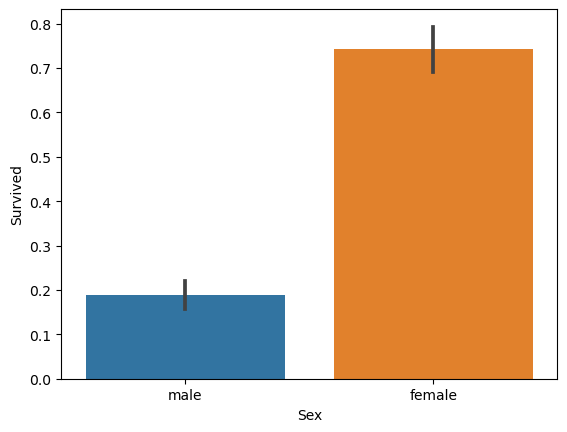

In [126]:
#Percentage of passengers survived grouped by gender

sns.barplot(x='Sex',y='Survived',data=df)
df.groupby('Sex').Survived.mean()

##### The above graph shows the effect of gender on the survival rate of the passengers. The number of females who survived was much more than the males who survived. 74% of the females survived, and on the other hand, only 18% of the males survived.

<Axes: xlabel='Survived', ylabel='count'>

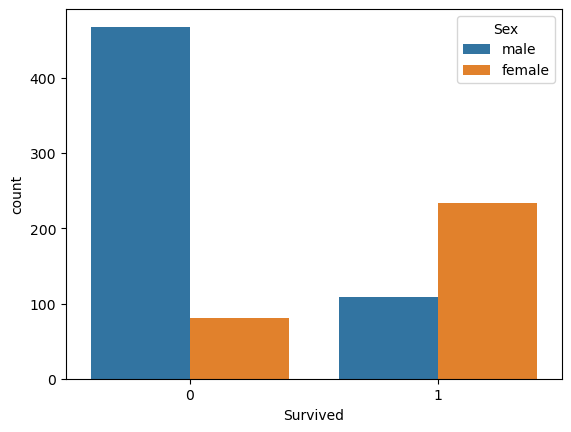

In [127]:
sns.countplot(hue='Sex',x='Survived',data=df)


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

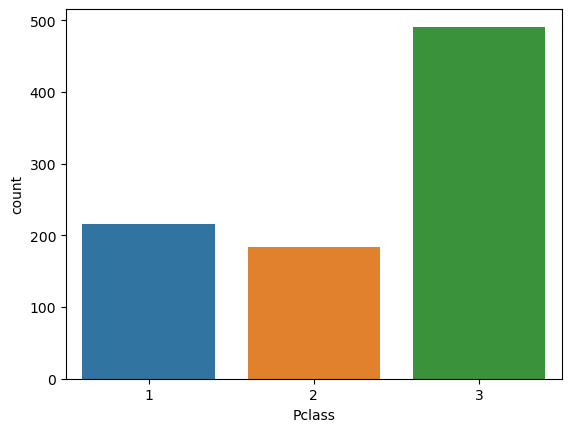

In [128]:
###Count of passengers based on Pclass
sns.countplot(x='Pclass',data=df)
df['Pclass'].value_counts()

##### The above graph shows that the Number of passengers belonging to the 3rd class is 491, which is the maximum, the number of passengers belonging to the 1st class is 216, which is the second-highest, and the number of passengers belonging to the 2nd class is 184 which is the minimum.



In [129]:
#Precentage of passengers survived grouped by Pclass

df.groupby('Pclass',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


AttributeError: 'numpy.int64' object has no attribute 'startswith'

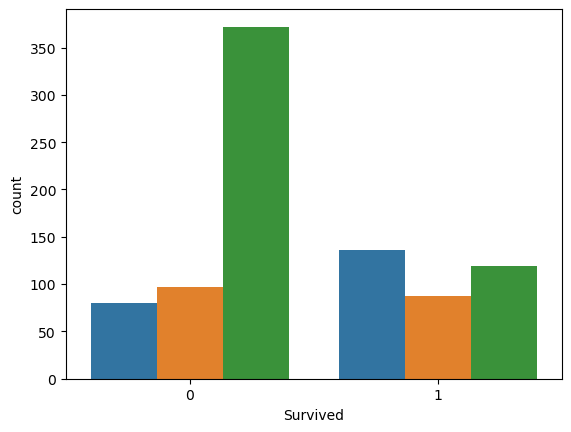

In [103]:
###Count of passengers survived based on Pclass

sns.countplot(x='Survived', hue='Pclass', data=df)


##### It is clear from the above graph that most of them belong to the 3rd class among the passengers who did not survive. And among the passengers who survived, most of them belong to 1st class.



Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

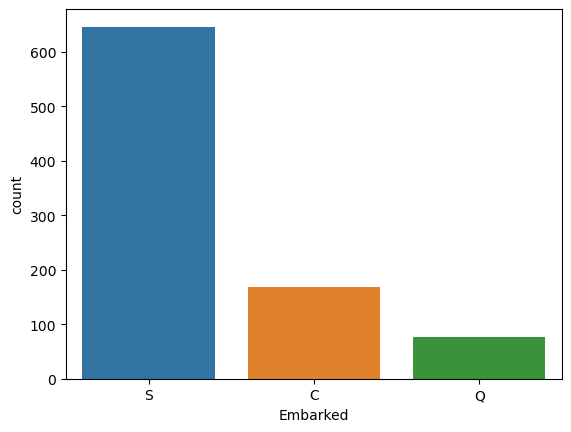

In [59]:
#Count of the passengers basen on Emabarked
sns.countplot(x='Embarked',data=df)
df['Embarked'].value_counts()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


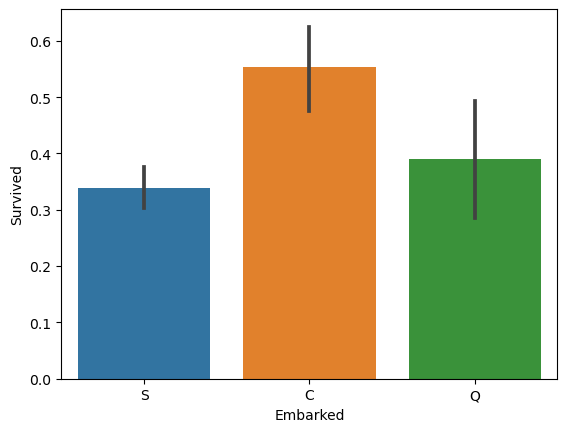

In [61]:
### Precentage of the passengers grouped by port of Embarkation
sns.barplot(x='Embarked',y='Survived',data=df)
df.groupby('Embarked',as_index=False).Survived.mean()

##### The above graph shows that the passengers that embarked from port Cherbourg had a higher rate of Survival at 55.35%

<Axes: xlabel='Survived', ylabel='count'>

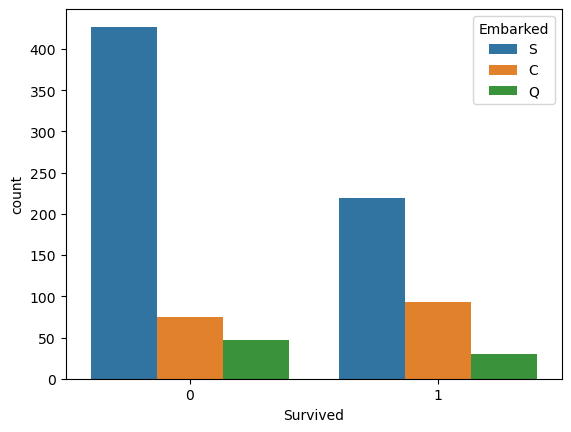

In [63]:
#Count of passengers survived based on port of Embarkation
sns.countplot(x='Survived', hue='Embarked', data=df)

##### It is clear from the above graph that most of them embarked from Southampton among the passengers who did not survive. And among the passengers who survived, most of them embarked from Southampton.

TravelAlone
1    537
0    354
Name: count, dtype: int64

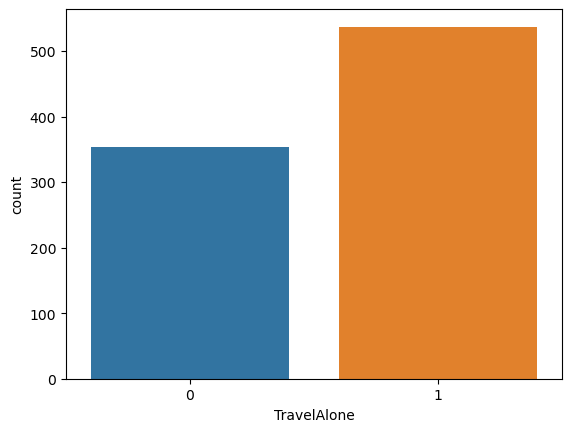

In [68]:
#Count of passengers based on TravelAlone
sns.countplot(x='TravelAlone',data=df)
df['TravelAlone'].value_counts()

,TravelAlone,Survived
0,0,0.505650
1,1,0.303538


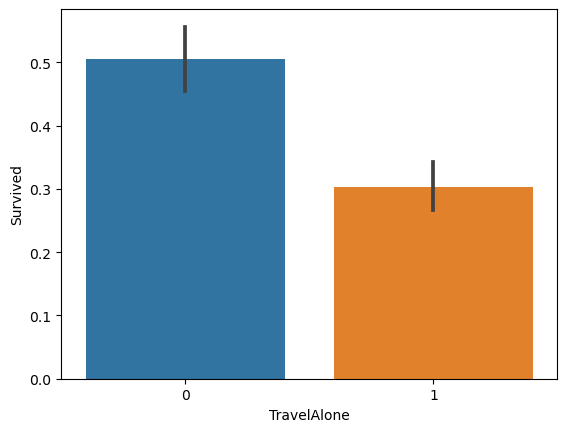

In [70]:
##Precentage of the passengers grouped by TravelAlone
sns.barplot(x='TravelAlone',y='Survived',data=df)
df.groupby('TravelAlone',as_index=False).Survived.mean()


The Median age of passengers is: 28


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


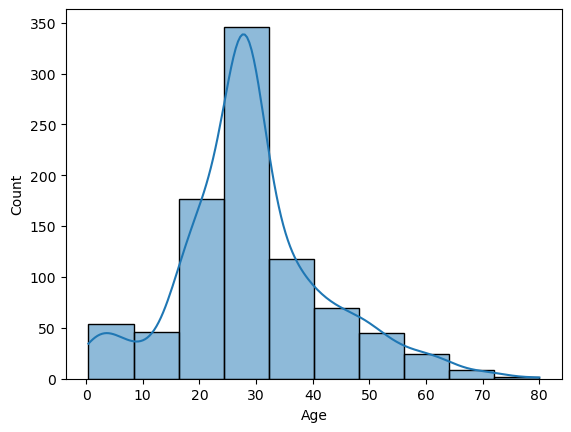

In [75]:
#Age Distribution
sns.histplot(df['Age'],bins=10,kde=True)
print("The Median age of passengers is:", int(df.Age.median()))

##### The above histogram shows the age distribution. The passengers on the ship were between 0 to 80 years. Therefore, we can say that it is normally distributed.

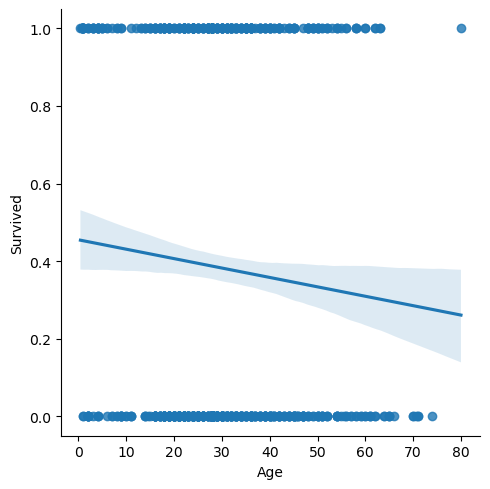

In [76]:
#Age group which is more likely to survive
sns.lmplot(x='Age',y='Survived',data=df)

##### It is clear from the above graph that younger individuals were more likely to survive as we can see that the regression line shows a negative correlation. Therefore increase in age leads to a lesser chance of survival.

Survived
0    549
1    342
Name: count, dtype: int64

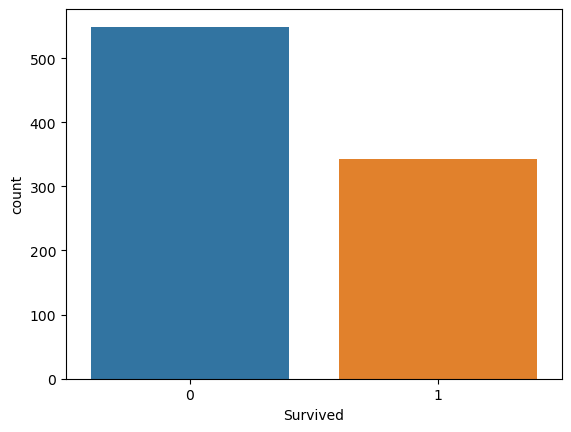

In [80]:
#Count of the passengers survived
sns.countplot(x='Survived',data=df)
df['Survived'].value_counts()

In [83]:
df.corr(numeric_only = True)

,Survived,Pclass,Age,Fare,TravelAlone
Survived,1.000000,-0.338481,-0.064910,0.257307,-0.203367
Pclass,-0.338481,1.000000,-0.339898,-0.549500,0.135207
Age,-0.064910,-0.339898,1.000000,0.096688,0.171647
Fare,0.257307,-0.549500,0.096688,1.000000,-0.271832
TravelAlone,-0.203367,0.135207,0.171647,-0.271832,1.000000


### Model Building
##### Before building the model, we need to perform label encoding for the categorical variables because categorical data must be encoded into numbers before using it to fit and evaluate a model.

### Label encoding

In [105]:
label_encoder = LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Embarked']=label_encoder.fit_transform(df['Embarked'])


##### sklearn.preprocessingIt provides several common utility functions and transformer classes to change raw feature vectors into a more suitable representation for the downstream estimators.

##### LabelEncoder(): It is used to transform non-numerical labels into numerical labels.

##### fit_transform(): It is used to fit the label encoder, and it returns the encoded labels.



In [106]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,1


In [89]:
#Setting the value for dependent and independent variables

x=df.drop(columns='Survived',axis=1)
y=df['Survived']

In [90]:
x.head()

,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,3,1,22.0,7.2500,2,0
1,1,0,38.0,71.2833,0,0
2,3,0,26.0,7.9250,2,1
3,1,0,35.0,53.1000,2,0
4,3,1,35.0,8.0500,2,1


In [91]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [92]:
#Splitting the dataset

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size= 0.30,random_state=2)

##### from sklearn.model_selection import train_test_split: It is used for splitting data arrays into two subsets: for training data and testing data. With this function, you don’t need to divide the dataset manually.

##### We need to split our dataset into training and testing sets. We’ll perform this by importing train_test_split from the sklearn.model_selection library. It is usually good to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

##### test_size: This parameter specifies the size of the testing dataset. The default state suits the training size. It will be set to 0.25 if the training size is set to default.

##### randon_state: This parameter controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

In [93]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [95]:
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0])

#### Once we have fitted (trained) the model, we can make predictions using the predict() function. We pass the values of x_test to this method and compare the predicted values called y_pred with y_test values to check how accurate our predicted values are.

### Actual values and the predicted values

In [96]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()


,Actual value,Predicted value
33,0,0
372,0,0
223,0,0
273,0,0
55,1,0


In [107]:
### Evaluating the Model
#Confusion matrix and classification report
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print(classification_report(y_test,y_pred))

[[146  23]
 [ 32  67]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       169
           1       0.74      0.68      0.71        99

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



##### Accuracy: Accuracy represents the number of correctly classified data instances over the total number of data instances. The accuracy obtained from the classification report is 0.79, which indicates that the accuracy of the model is 79%.

##### Precision: It is the number of correct positive results divided by the number of positive results predicted by the classifier. The precision obtained from the classification report is 0.79, which indicates that the precision of the model is 79%.

##### Recall: Recall gives a measure of how accurately our model can identify the relevant data. The recall value obtained from the classification report is 0.87, which indicates that the model can identify 87% of the relevant data.

##### f1-score: f1-Score is used to measure a test’s accuracy. The f1-score obtained from the classification report is 0.83, which indicates that the test accuracy is 83%.

### Conclusion

##### There were 891 records in the dataset, out of which 70% of the data was given for training the model and 30% of the data, i.e., 268 records, were given for testing the model. And out of 268 records, 57 records were misclassified.